### Glacier length supplemental plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

In [2]:
# Plot glacier data from Taryn - csv spreadsheet
glacier_annual_xl = pd.ExcelFile("../Data-cleaning/data/glacier_data_annual.xlsx")
glacier_seasonal_xl = pd.ExcelFile("../Data-cleaning/data/glacier_data_seasonal.xlsx")

print(glacier_annual_xl.sheet_names)
print(glacier_seasonal_xl.sheet_names)

sver_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[0])
ko_annual_df   = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[1])
rink_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[2])

sver_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[0])
ko_seasonal_df   = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[1])
rink_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[2])

['Sverdrup', 'Kong Oscar', 'Rink']
['Sverdrup', 'Kong Oscar', 'Rink']


In [3]:
rink_annual_da = xr.DataArray(np.array(rink_annual_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(rink_annual_df.date, dtype='datetime64')))

ko_annual_da = xr.DataArray(np.array(ko_annual_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(ko_annual_df.date, dtype='datetime64')))

sver_annual_da = xr.DataArray(np.array(sver_annual_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(sver_annual_df.date, dtype='datetime64')))

In [4]:
rink_seasonal_da = xr.DataArray(np.array(rink_seasonal_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(rink_seasonal_df.date, dtype='datetime64'))).sel(time=slice('2015','2021'))

ko_seasonal_da = xr.DataArray(np.array(ko_seasonal_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(ko_seasonal_df.date, dtype='datetime64'))).sel(time=slice('2015','2021'))

sver_seasonal_da = xr.DataArray(np.array(sver_seasonal_df['length (km)']), dims=["time"],\
                                coords=dict(time=np.array(sver_seasonal_df.date, dtype='datetime64'))).sel(time=slice('2015','2021'))

In [5]:
years_all = pd.period_range(np.datetime64('1975-01'), freq='5Y', periods=10).strftime('%Y').tolist()
years_seasonal = pd.period_range(np.datetime64('2015-01'), freq='Y', periods=8).strftime('%Y').tolist()

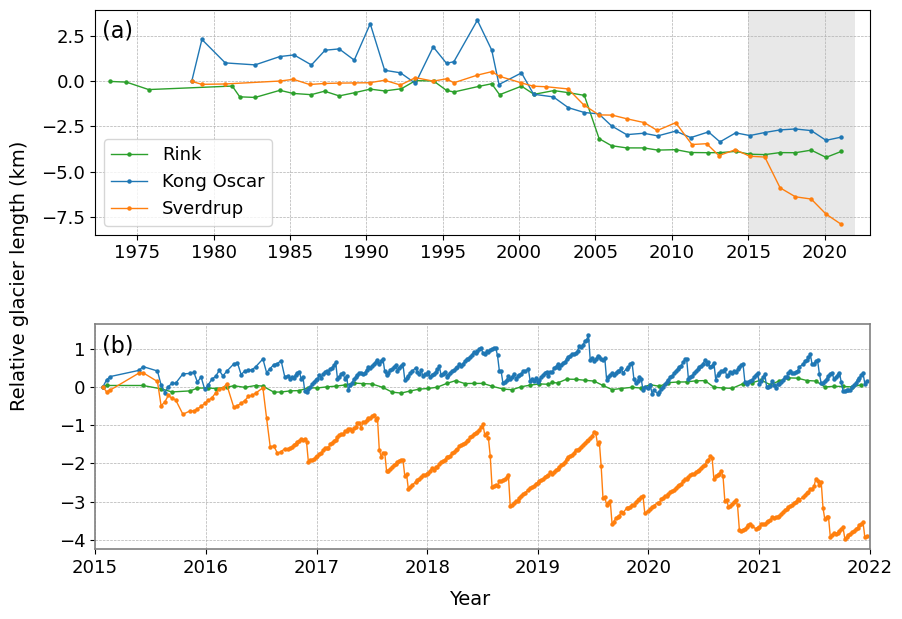

In [8]:
## make figure with two subplots, one for annual and one for seasonal data
plt.rcParams['font.size'] = '13'
# fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1.2, 1]},figsize=(12,4))
fig, axs = plt.subplots(2,1,figsize=(10,7))
plt.subplots_adjust(hspace=0.4)

# plot annual data
(rink_annual_da-rink_annual_da.isel(time=0)).plot(ax=axs[0],marker='o',markersize=2.2,linewidth=1,color='tab:green', label='Rink')
(ko_annual_da-ko_annual_da.isel(time=0)).plot(    ax=axs[0],marker='o',markersize=2.2,linewidth=1,color='tab:blue', label='Kong Oscar')
(sver_annual_da-sver_annual_da.isel(time=0)).plot(ax=axs[0],marker='o',markersize=2.2,linewidth=1,color='tab:orange', label='Sverdrup')
axs[0].legend(loc='lower left',prop={'size': 13})

# create shaded area in top plot to indicate region where we have higher resolution obs (shown in panel b)
axs[0].axvspan(np.datetime64("2015"), np.datetime64("2022"), color='lightgray', alpha=0.5, lw=0)

# plot seasonal data
(rink_seasonal_da-rink_seasonal_da.isel(time=0)).plot(ax=axs[1],marker='o',markersize=2.2,linewidth=1,color='tab:green', label='Rink')
(ko_seasonal_da-ko_seasonal_da.isel(time=0)).plot(    ax=axs[1],marker='o',markersize=2.2,linewidth=1,color='tab:blue', label='Kong Oscar')
(sver_seasonal_da-sver_seasonal_da.isel(time=0)).plot(ax=axs[1],marker='o',markersize=2.2,linewidth=1,color='tab:orange', label='Sverdrup')
# axs[1].legend(loc='lower left',prop={'size': 13})

for spine in axs[1].spines.values():
        spine.set_edgecolor('gray')
[x.set_linewidth(1.2) for x in axs[1].spines.values()]

axs[0].grid(linestyle='--', linewidth=0.5)
axs[1].grid(linestyle='--', linewidth=0.5)

axs[0].set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 16)
axs[1].set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 16)
axs[0].set_xlabel("")
axs[1].set_xlabel("")

axs[0].margins(x=0.02)
axs[1].margins(x=0)

axs[0].set_xticks(years_all, years_all, rotation=0, horizontalalignment = 'center')
axs[1].set_xticks(years_seasonal, years_seasonal, rotation=0, horizontalalignment = 'center')

fig.text(0.5, 0.03, 'Year', size=14, ha='center')
fig.text(0.04, 0.5, 'Relative glacier length (km)', size=14, va='center', rotation='vertical');

plt.savefig("figures/glacier_length_fig.png", bbox_inches='tight', dpi=300, facecolor='white');